# Regresión lógística binomial

[Curso de Regresión Logística con Python y scikit-learn](https://platiz.com/reglog)

## Carga de datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric

El código convierte la columna "TotalCharges" del DataFrame "df_data" en valores numéricos, tratando cualquier valor no numérico como NaN. Esto facilita el procesamiento y análisis posterior de los datos numéricos en esa columna.

Cuando se encuentra un valor que no se puede convertir a un número, como un texto o un valor faltante, normalmente se produciría un error. Sin embargo, al establecer "errors='coerce'", se le indica a la función que en lugar de generar un error, se maneje de manera más suave y se asigne NaN.

In [3]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')


**Valores Nan**

df_data.isnull() devuelve un DataFrame del mismo tamaño que df_data, donde cada celda contiene True si el valor correspondiente en df_data es nulo, y False en caso contrario. Luego, el método sum() se aplica a ese DataFrame resultante.

La función sum() en este contexto suma los valores booleanos a lo largo de las columnas, ya que se aplica por defecto en el eje 0 (columnas). Por lo tanto, el resultado es una serie que muestra la cantidad de valores nulos en cada columna del DataFrame df_data.

In [6]:
df_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Eliminamos los valores NaN en TotalCharges**

La línea de código df_data.dropna(inplace=True) se utiliza para eliminar las filas con valores faltantes (NaN) del DataFrame df_data de forma permanente.

Aquí está la explicación línea por línea:

*df_data: Es el DataFrame en el cual se desea eliminar las filas con valores faltantes.

*.dropna(): Es el método de pandas utilizado para eliminar las filas con valores faltantes de un DataFrame.

*inplace=True: Es un argumento opcional que se utiliza para indicar que los cambios deben aplicarse directamente en el DataFrame df_data en lugar de devolver un nuevo DataFrame con las filas eliminadas. Al establecerlo en True, se modifica df_data directamente.



In [5]:
df_data.dropna(inplace=True)

## Eliminar id

In [11]:
df_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


La línea de código df_data.drop('customerID', axis=1, inplace=True) se utiliza para eliminar la columna llamada 'customerID' del DataFrame df_data de forma permanente.

Aquí está la explicación línea por línea:

*df_data:* Es el DataFrame del cual se desea eliminar la columna.

 *drop('customerID', axis=1):* Es el método de pandas utilizado para eliminar una columna por su nombre. El argumento 'customerID' indica el nombre de la columna a eliminar, y axis=1 se utiliza para especificar que se eliminará una columna (en lugar de una fila).

 *inplace=True:* Es un argumento opcional que se utiliza para indicar que los cambios deben aplicarse directamente en el DataFrame df_data en lugar de devolver un nuevo DataFrame sin la columna eliminada. Al establecerlo en True, se modifica df_data directamente.

In [10]:
df_data.drop('customerID',axis=1,inplace=True)

## Convertir a numérico variable objetivo

Este código se utiliza para transformar los valores de la columna "churn" en el DataFrame df_data de **"yes" y "No" a 1 y 0, respectivamente.**

*inplace=True* indica que el reemplazo se debe realizar directamente en el DataFrame df_data, sin necesidad de asignar el resultado a una nueva variable.

In [8]:
df_data["Churn"].replace(to_replace="Yes",value=1,inplace=True)
df_data["Churn"].replace(to_replace="No",value=0,inplace=True)


In [12]:
df_data["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

La línea de código df_data_processing = df_data.copy() crea una copia del DataFrame df_data y la asigna a la variable df_data_processing.

In [13]:
df_data_processing = df_data.copy()

# Manejo de variables categóricas (Codificacion One Not)

In [ ]:
df_data_processing

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


**Codificacion One Not**

El código *pd.get_dummies(df_data_processing)* se utiliza para realizar la codificación one-hot.

La codificación one-hot es una técnica que se utiliza para convertir variables categóricas en variables numéricas binarias. Crea nuevas columnas en el DataFrame para cada categoría única en la columna original y asigna un valor de 1 o 0 para indicar la presencia o ausencia de esa categoría en cada fila.

Al aplicar *pd.get_dummies(df_data_processing)*, se generará un nuevo DataFrame en el que cada columna representará una categoría única de las variables categóricas presentes en df_data_processing. Cada fila en estas columnas binarias contendrá un valor de 1 si la categoría está presente en esa fila y un valor de 0 si no lo está.

In [14]:
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Analisis de correlación

In [31]:
import matplotlib.pyplot as plt

La línea de código df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar') realiza un gráfico de barras que muestra las correlaciones de las variables del DataFrame df_data_processing con la columna 'Churn', ordenadas de forma ascendente.

Aquí está la explicación de la línea de código:

**df_data_processing:* Es el DataFrame del cual se desea calcular las correlaciones.

**.corr():* Es un método de pandas que calcula la matriz de correlación entre las variables numéricas del DataFrame.

**['Churn']:*  Selecciona la columna 'Churn' de la matriz de correlación.

**.sort_values(ascending=True):* Ordena los valores de correlación de forma ascendente.

**.plot(kind='bar'):* Crea un gráfico de barras para visualizar los valores de correlación ordenados.

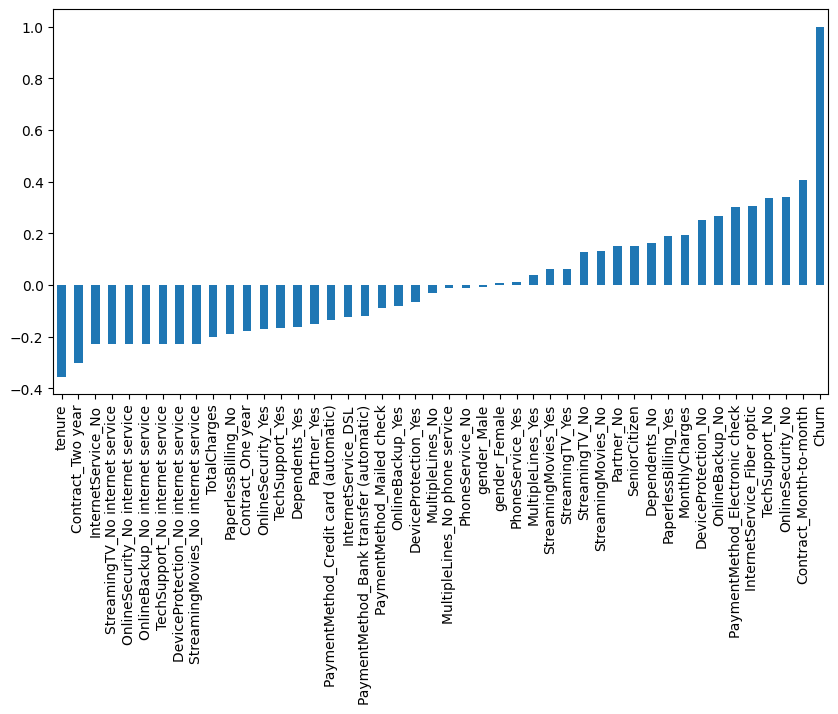

In [ ]:
fig = plt.figure(figsize=(10,5))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Escalabilidad de los datos con el metodo MinMaxScaler()

 MinMaxScaler() escala las características al rango especificado, mientras que StandardScaler() estandariza las características para que tengan una media de 0 y una desviación estándar de 1. La elección entre ellos depende de la naturaleza de los datos y los requisitos del algoritmo que se vaya a utilizar. Si se requiere un rango específico o se está trabajando con algoritmos sensibles a los valores atípicos, MinMaxScaler() puede ser más apropiado. Por otro lado, si se desea estandarizar los datos y se quiere evitar la sensibilidad a los valores atípicos, StandardScaler() es una opción más adecuada.

In [15]:
from sklearn.preprocessing import MinMaxScaler

La línea de código scaler = MinMaxScaler() crea un objeto MinMaxScaler, que se utiliza para realizar el escalado de características.

La siguiente línea de código df_data_processing_scaled = scaler.fit_transform(df_data_processing) aplica el escalado de características a todas las columnas numéricas del DataFrame df_data_processing utilizando el objeto scaler creado anteriormente. El resultado del escalado se asigna a un nuevo DataFrame llamado df_data_processing_scaled.

In [16]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

Con este escalamiento obtengo un Array que luego debo convertirlo a dataFrame

In [17]:
df_data_processing_scaled

array([[0.        , 0.        , 0.11542289, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.46478873, 0.38507463, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.01408451, 0.35422886, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.14084507, 0.11293532, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.04225352, 0.55870647, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91549296, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled) # convierte el array en DF

In [19]:
df_data_processing_scaled.columns = df_data_processing.columns #Agrego los nombres de las columnas que se perdieron en el escalamiento

In [20]:
df_data_processing_scaled.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Análisis exploratorio de datos

In [21]:
import seaborn as sns

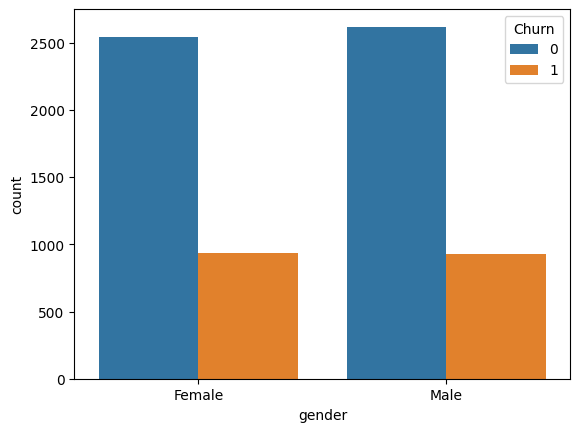

In [ ]:
sns.countplot(data=df_data, x='gender',hue='Churn')
plt.show()

In [ ]:
def plot_categorial(column):
    fig = plt.figure(figsize=(4,4))
    sns.countplot(data=df_data, x=column,hue='Churn')
    plt.show()

Utilizamos el Df original .data

In [ ]:
column_cat = df_data.select_dtypes(include='object').columns

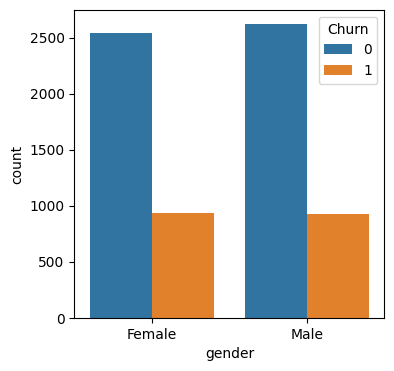

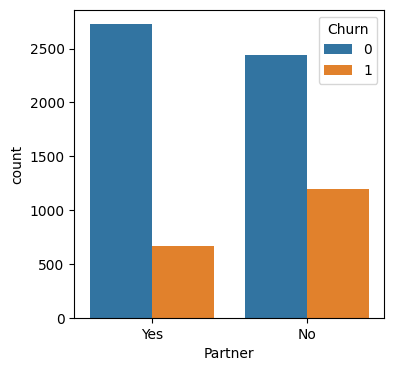

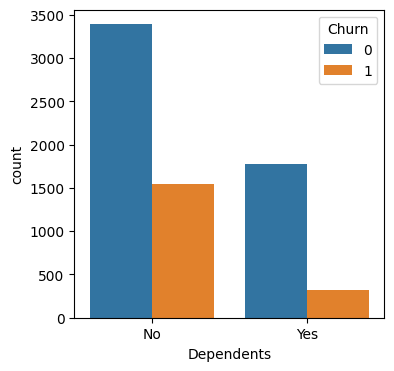

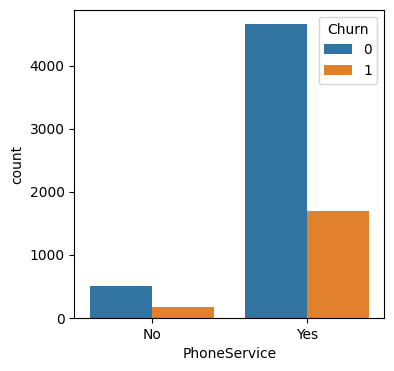

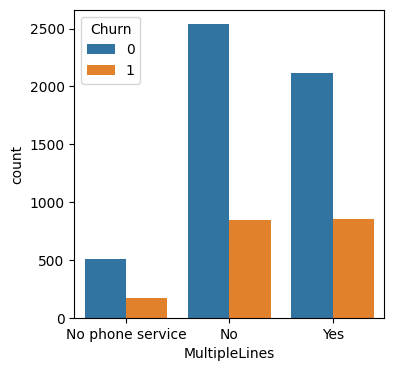

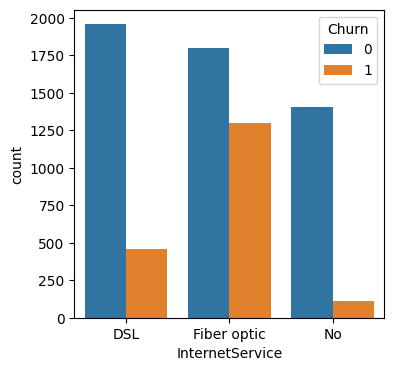

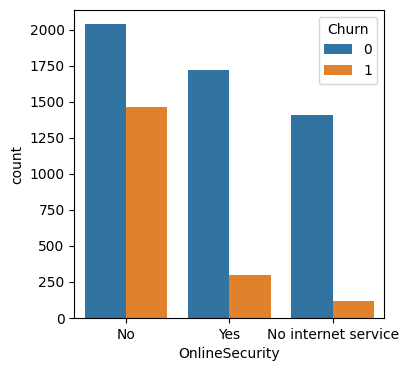

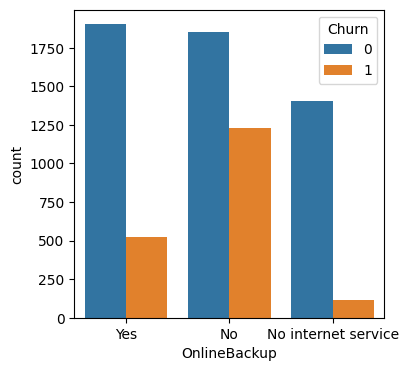

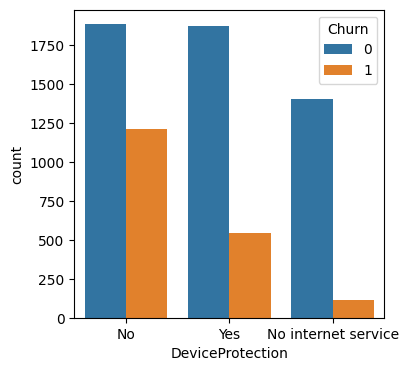

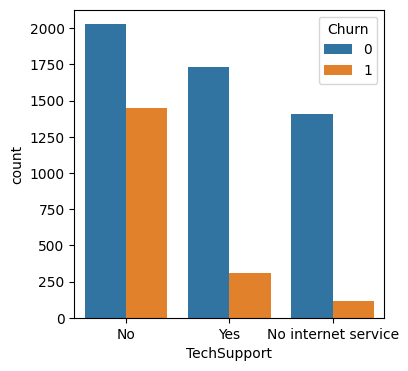

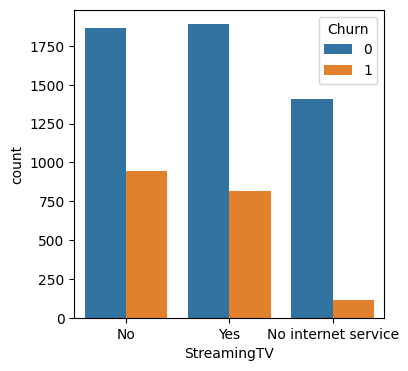

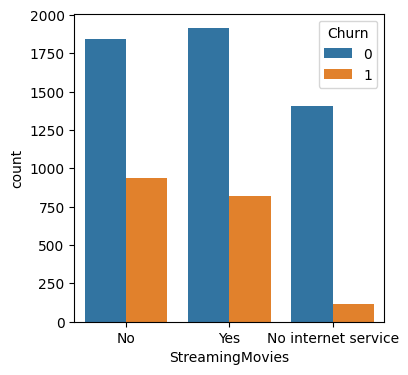

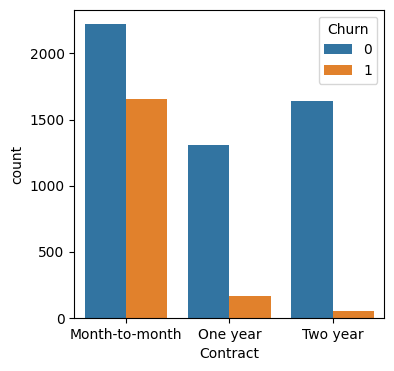

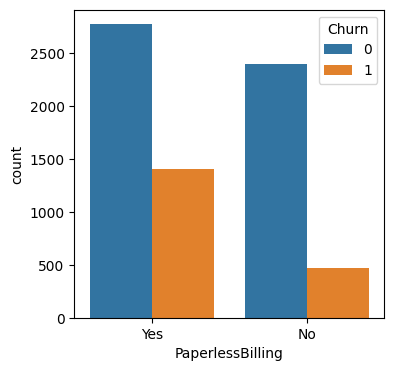

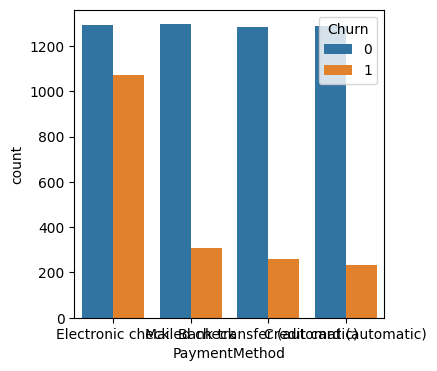

In [ ]:
for _ in column_cat:
  plot_categorial(_)

Realizamos un bucle que itera sobre cada elemento de la lista column_cat y llama a la función plot_categorial() pasando ese elemento como argumento.

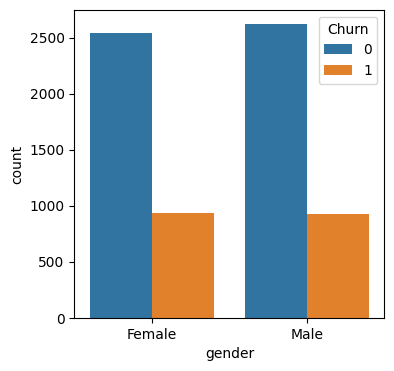

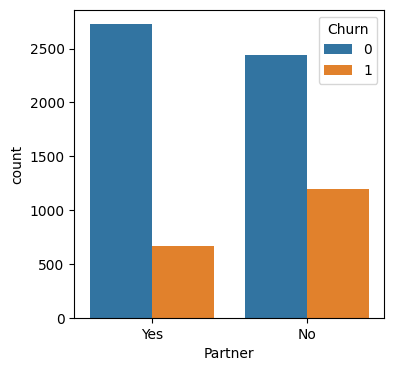

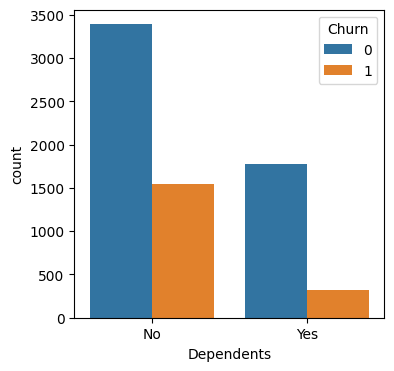

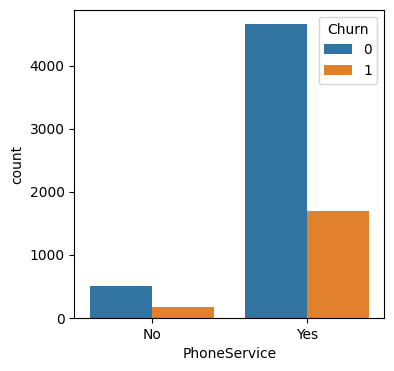

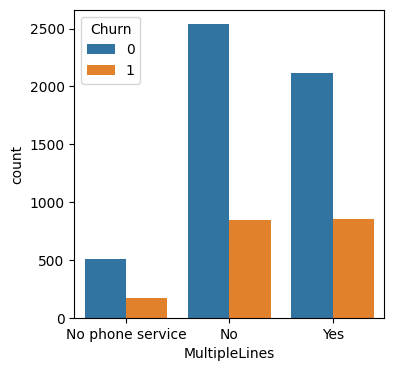

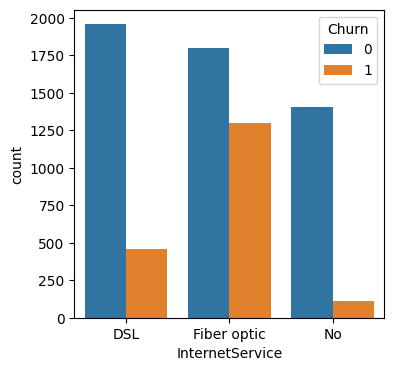

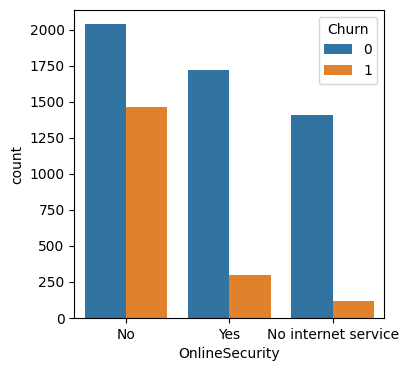

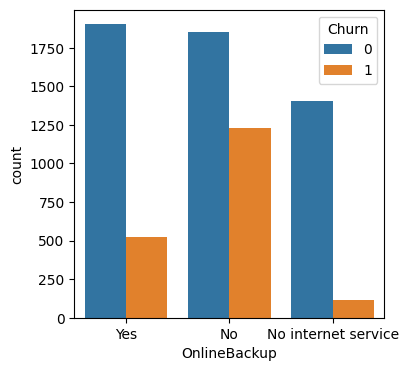

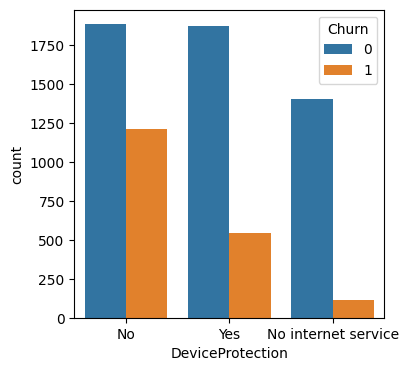

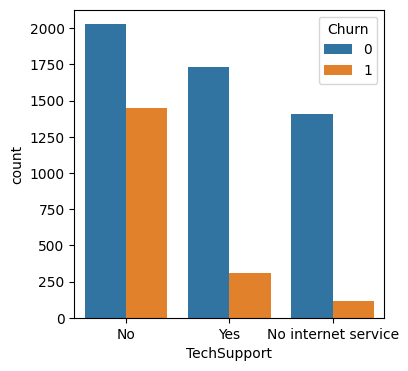

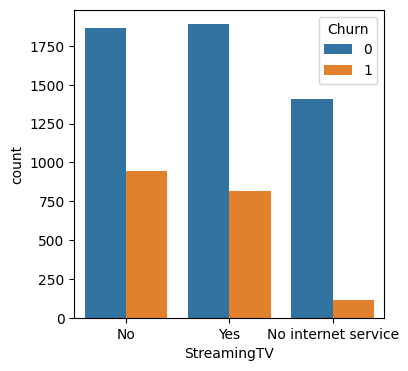

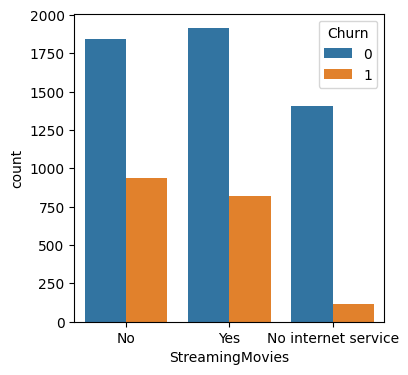

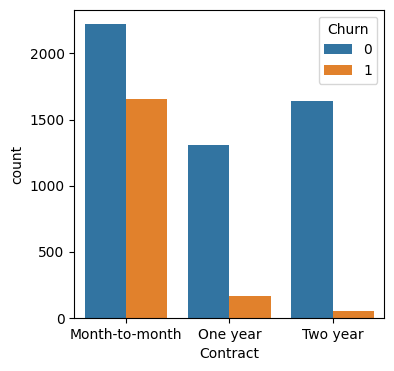

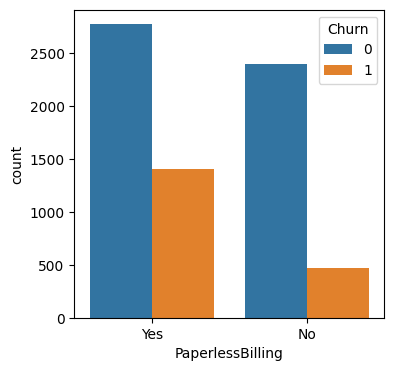

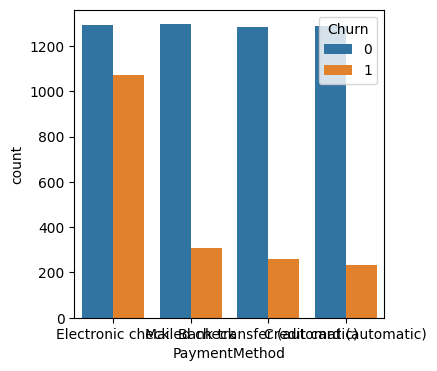

In [ ]:
 MinMaxScaler() escala las características al rango especificado, mientras que StandardScaler() estandariza las características para que tengan una media de 0 y una desviación estándar de 1. La elección entre ellos depende de la naturaleza de los datos y los requisitos del algoritmo que se vaya a utilizar. Si se requiere un rango específico o se está trabajando con algoritmos sensibles a los valores atípicos, MinMaxScaler() puede ser más apropiado. Por otro lado, si se desea estandarizar los datos y se quiere evitar la sensibilidad a los valores atípicos, StandardScaler() es una opción más adecuada.

Hacemos lo mismos graficoscon otro Codigo utilizando un Bucle for del Tipo zip()
Dentro del bucle, puedes utilizar var para acceder a cada nombre de columna categórica y ax para acceder a cada eje (subparcela) correspondiente. Esto te permite realizar operaciones específicas para cada columna categórica y su subparcela asociada dentro de la figura.

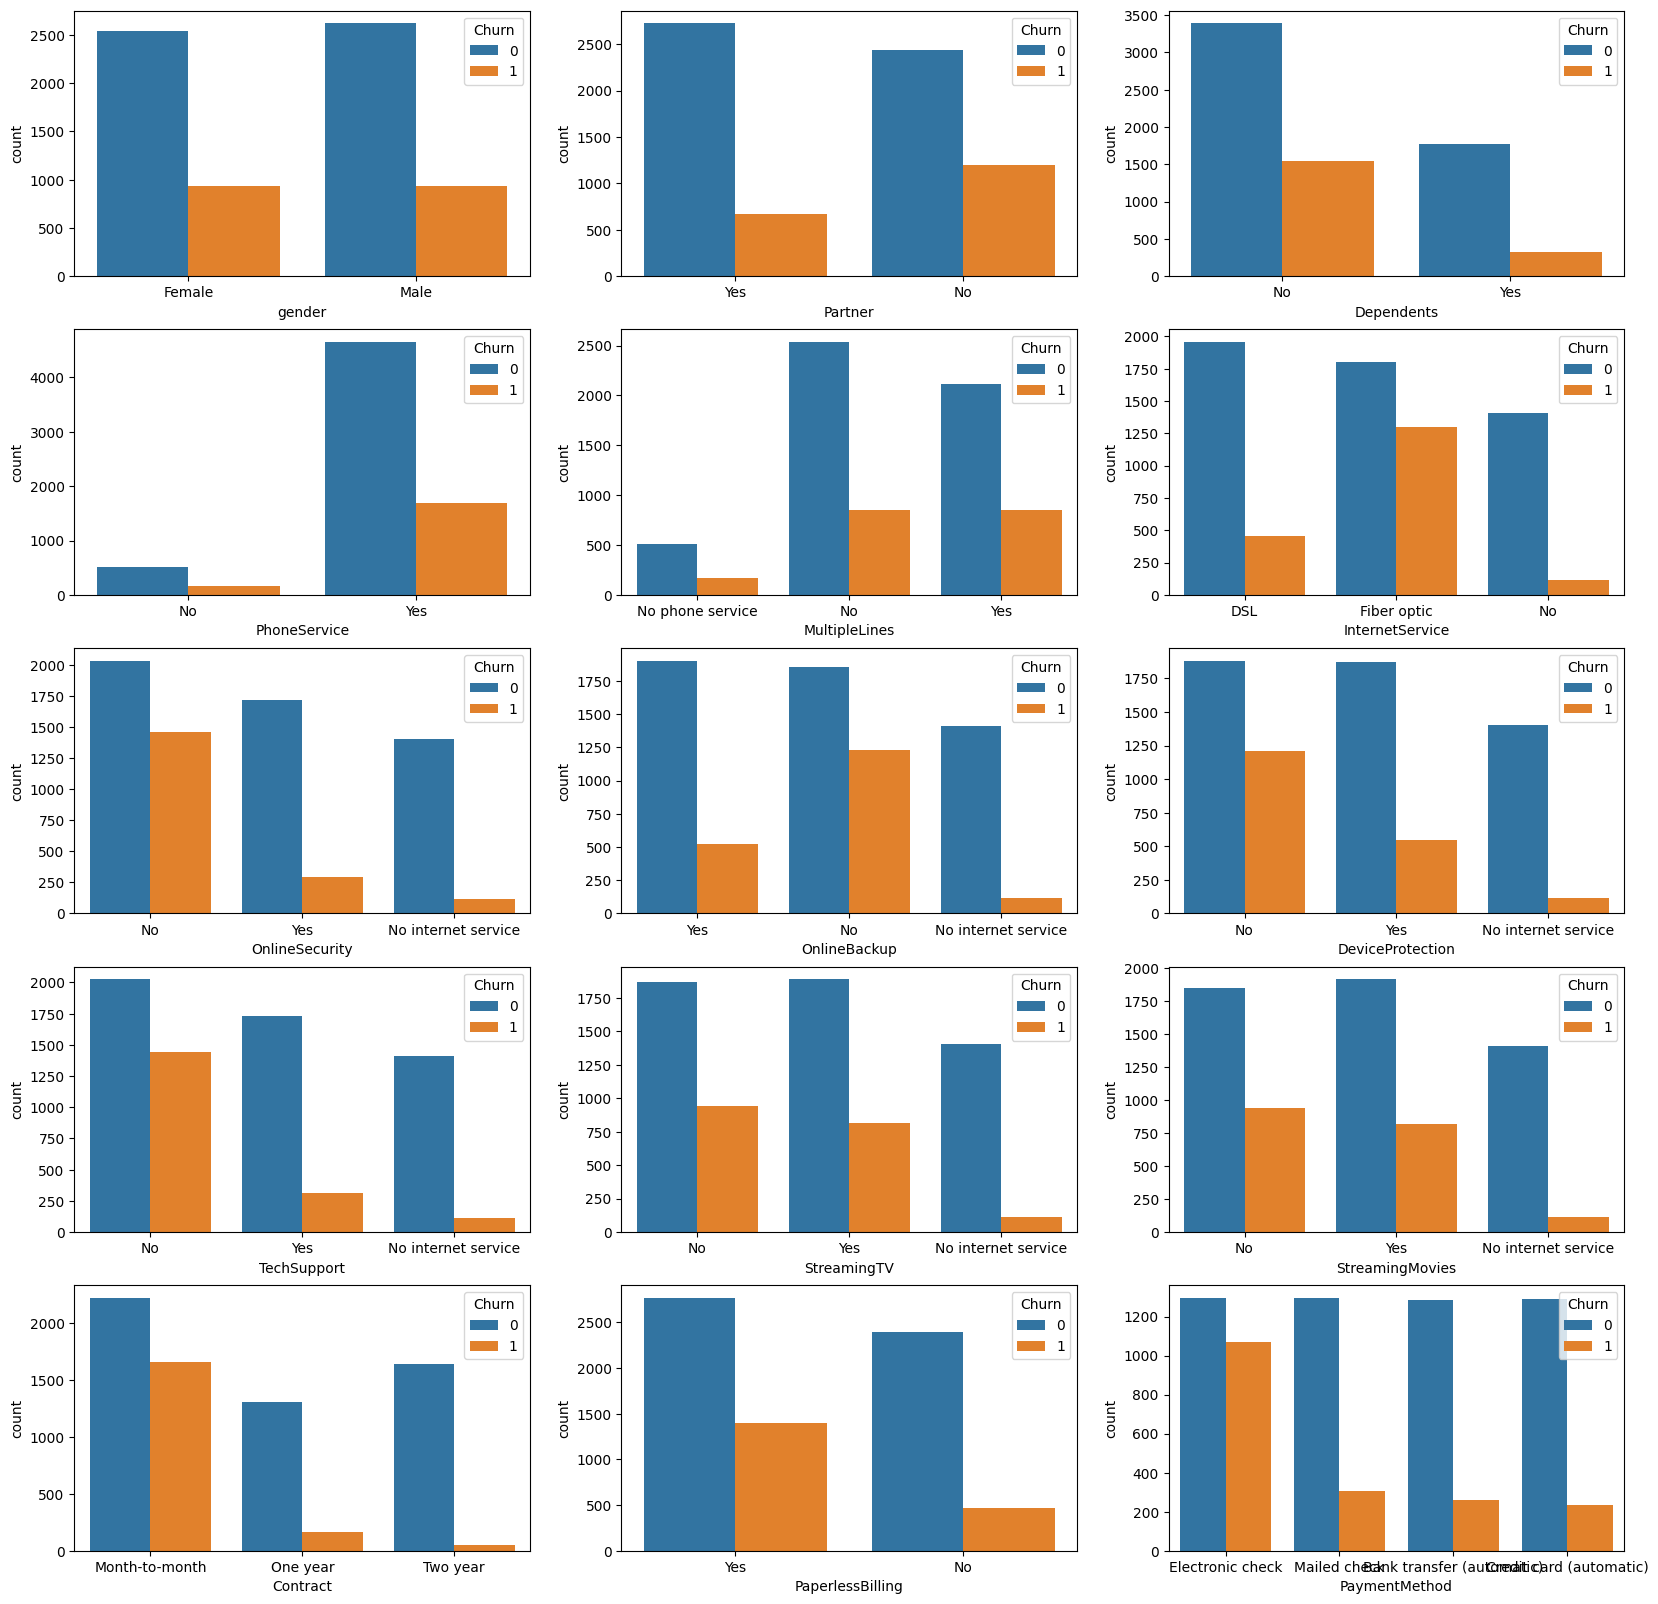

In [ ]:
columns_cat = df_data.select_dtypes(include='object').columns

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

for var, ax in zip(columns_cat, axs.flatten()):
    sns.countplot(data=df_data, x=var,hue='Churn', ax=ax)

<Figure size 1000x1000 with 0 Axes>

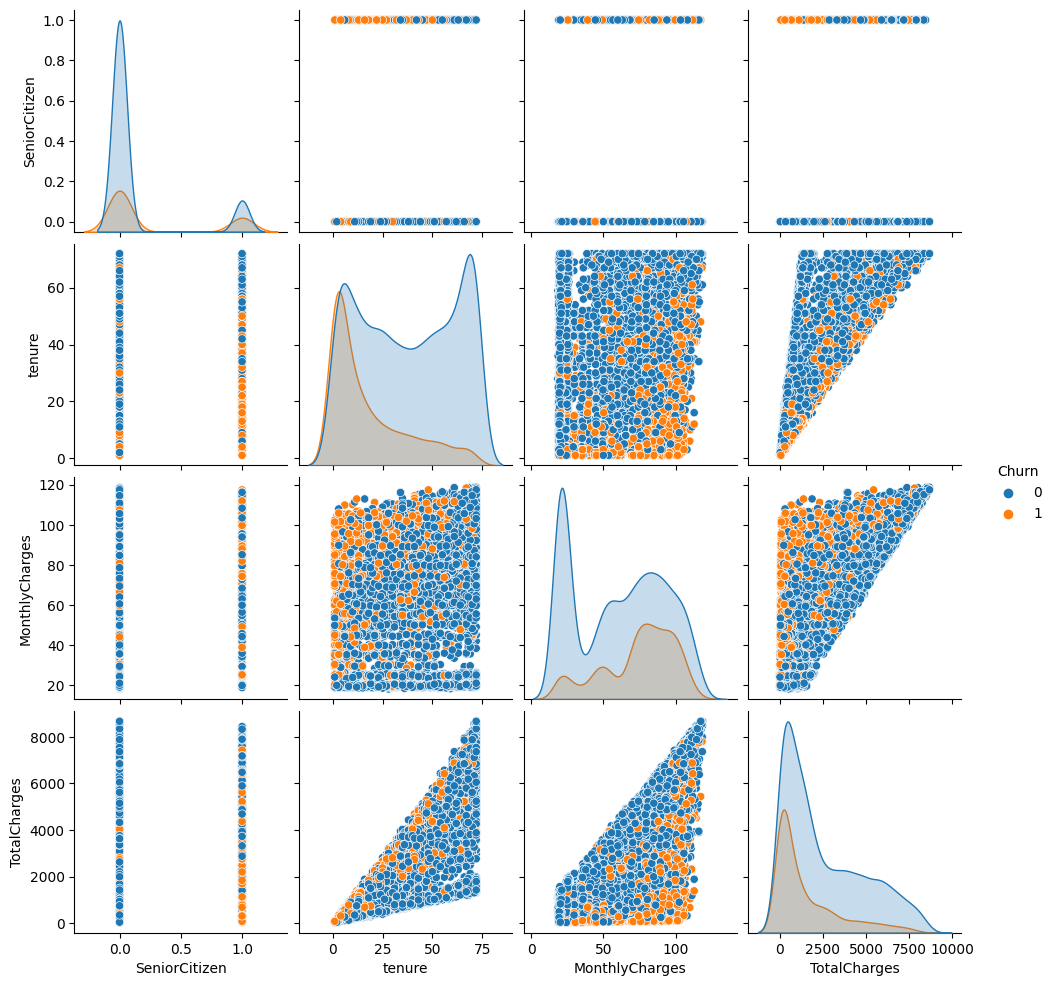

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_data, hue='Churn')
plt.show()

## Entrenamiento del modelo de regresión logística binomial

In [22]:
# Divide los datos en características (X) y etiquetas (y)
X = df_data_processing_scaled.drop('Churn',axis=1)
y = df_data_processing_scaled['Churn'].values

In [23]:
# Divide los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [25]:
#Definimos un modelo de regresión logística utilizando la clase LogisticRegression de scikit-learn.
from sklearn.linear_model import  LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 **Predecimos** las etiquetas de un conjunto de datos de prueba **utilizando un modelo de regresión logística entrenado previamente**, y luego calcula y muestra la precisión del modelo utilizando la métrica de precisión (accuracy_score) del módulo metrics de scikit-learn.

In [26]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

0.795734597156398


## Evaluación del modelo

In [27]:
model.predict_proba(X_test)

array([[0.9902118 , 0.0097882 ],
       [0.86177512, 0.13822488],
       [0.30193053, 0.69806947],
       ...,
       [0.99028271, 0.00971729],
       [0.70132406, 0.29867594],
       [0.82865273, 0.17134727]])

In [28]:
model.coef_

array([[ 2.16456329e-01, -3.10072438e+00, -1.62275558e-01,
         1.19637002e+00,  9.38227765e-04, -2.24786684e-02,
        -7.14958453e-02,  4.99554047e-02,  1.16808125e-01,
        -1.38348565e-01,  8.51141942e-02, -1.06654635e-01,
        -1.58854568e-01,  8.51141942e-02,  5.21999335e-02,
        -4.17809899e-01,  5.11407650e-01, -1.15138192e-01,
         2.40091205e-01, -1.15138192e-01, -1.46493454e-01,
         8.40771354e-02, -1.15138192e-01,  9.52061616e-03,
         5.65202109e-02, -1.15138192e-01,  3.70775407e-02,
         2.20216931e-01, -1.15138192e-01, -1.26619180e-01,
        -8.59200111e-02, -1.15138192e-01,  1.79517763e-01,
        -8.76623695e-02, -1.15138192e-01,  1.81260121e-01,
         7.42705642e-01, -9.75380680e-02, -6.66708014e-01,
        -1.13990474e-01,  9.24500336e-02, -2.72553507e-03,
        -1.58698780e-01,  2.16924691e-01, -7.70408172e-02]])

In [ ]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Creamos Serie de pandas llamada weights, donde cada valor en la serie representa el coeficiente correspondiente a una característica y el índice de la serie es el nombre de la característica.

Esta serie puede ser útil para analizar la importancia relativa de cada característica en el modelo de regresión logística. **Los coeficientes positivos indican que las características tienen una influencia positiva en la predicción de la clase objetivo, mientras que los coeficientes negativos indican una influencia negativa.** ***Los valores absolutos más grandes indican una mayor importancia relativa de la característica en el modelo.***

Es decir que permite ver la importancia de cada una de las caracteristicas al momento de hacer una prediccion.


AxesSubplot(0.125,0.125;0.775x0.755)


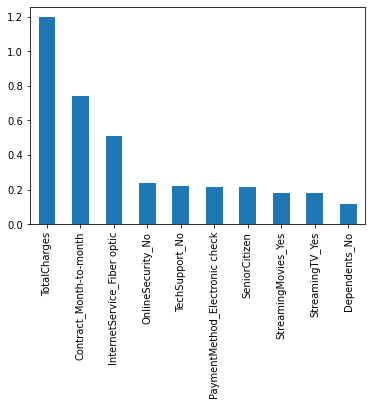

In [ ]:
#gráfico de barras de las 10 características con los coeficientes más altos en orden Ascendente

weights = pd.Series(model.coef_[0],
                  index=X.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar')) #[:10] indica que muestre los top 10

AxesSubplot(0.125,0.125;0.775x0.755)


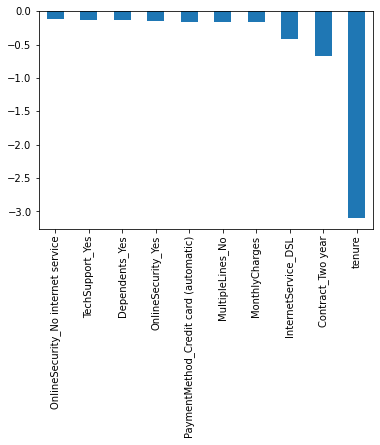

In [ ]:
#gráfico de barras de las 10 características con los coeficientes más altos en orden descendente

print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))# [-10:] indica los valores top 10 negativos

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1500x1500 with 0 Axes>

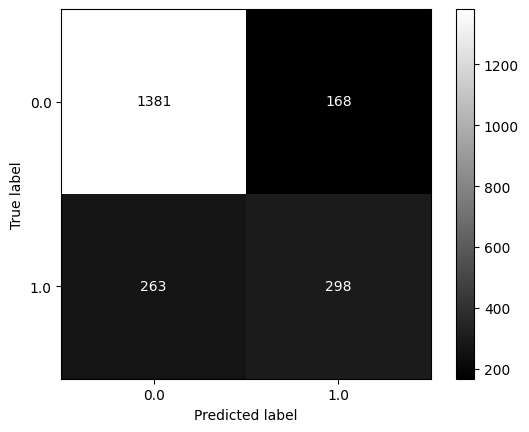

In [32]:
fig = plt.figure(figsize=(15,15))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

# Regularización

Esta técnica consiste en disminuir la complejidad de nuestro modelo a través de una penalización aplicada a sus variables más irrelevantes.

Para este ejemplo compararemos los resultados obtenidos con los distintos métodos de regularización usando la misma semilla y el mismo solver (saga)

> C es un parámetro que define que tanto se penaliza a los features que menos aportan, debe ser siempre un valor positivo y mientras mas pequeño mayor sera la penalización

In [33]:
lasso=LogisticRegression(max_iter=10000, penalty='l1',solver='saga',C=0.5)
lasso.fit(X_train, y_train)
lasso.score(X_test,y_test)

0.7962085308056872

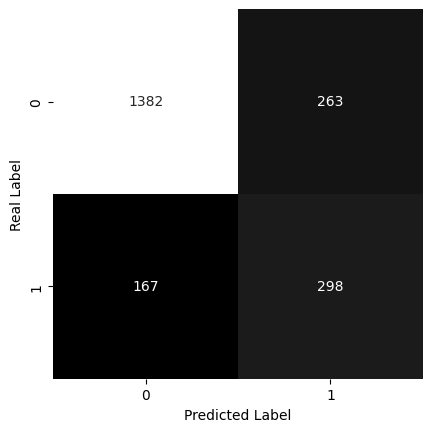

In [34]:
cm=confusion_matrix(lasso.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d"
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label');

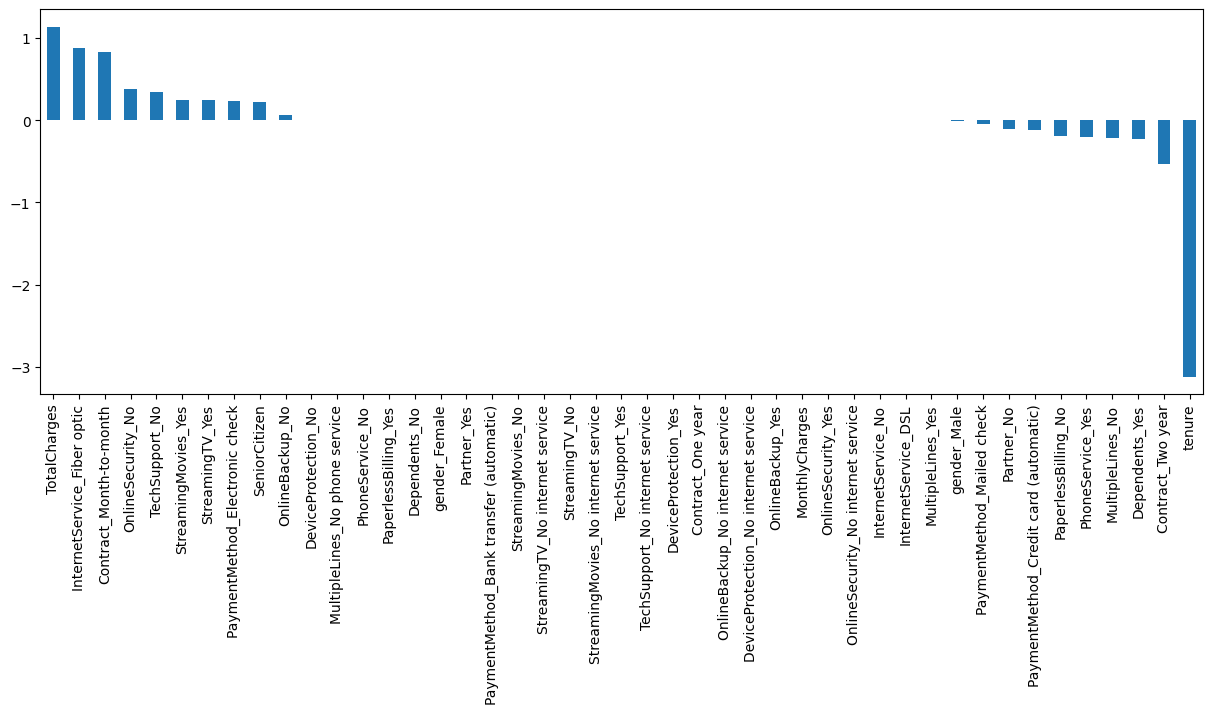

In [35]:
weights = pd.Series(lasso.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

Podemos ver cuales de nuestros parámetros se convirtieron a 0:

In [36]:
weights[weights==0]

StreamingMovies_No                      0.0
StreamingTV_No internet service         0.0
StreamingTV_No                          0.0
StreamingMovies_No internet service     0.0
TechSupport_Yes                         0.0
TechSupport_No internet service         0.0
DeviceProtection_Yes                    0.0
Contract_One year                       0.0
OnlineBackup_No internet service        0.0
DeviceProtection_No internet service    0.0
OnlineBackup_Yes                        0.0
MonthlyCharges                          0.0
OnlineSecurity_Yes                      0.0
OnlineSecurity_No internet service      0.0
InternetService_No                      0.0
InternetService_DSL                     0.0
MultipleLines_Yes                       0.0
dtype: float64

### L2 Ridge

Reduce la complejidad disminuyendo el impacto de ciertos features a nuestro modelo.
Penaliza los features poco relevantes, pero no los vuelve cero. Solamente limita la información que aportan a nuestro modelo.

In [37]:
ridge=LogisticRegression(max_iter=10000, penalty='l2',solver='saga',C=0.5)
ridge.fit(X_train, y_train)
ridge.score(X_test,y_test)

0.7966824644549763

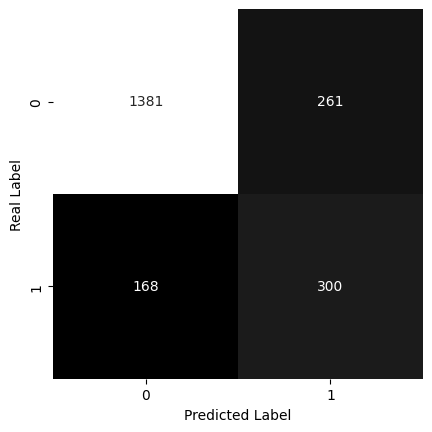

In [38]:
cm=confusion_matrix(ridge.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d"
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label');

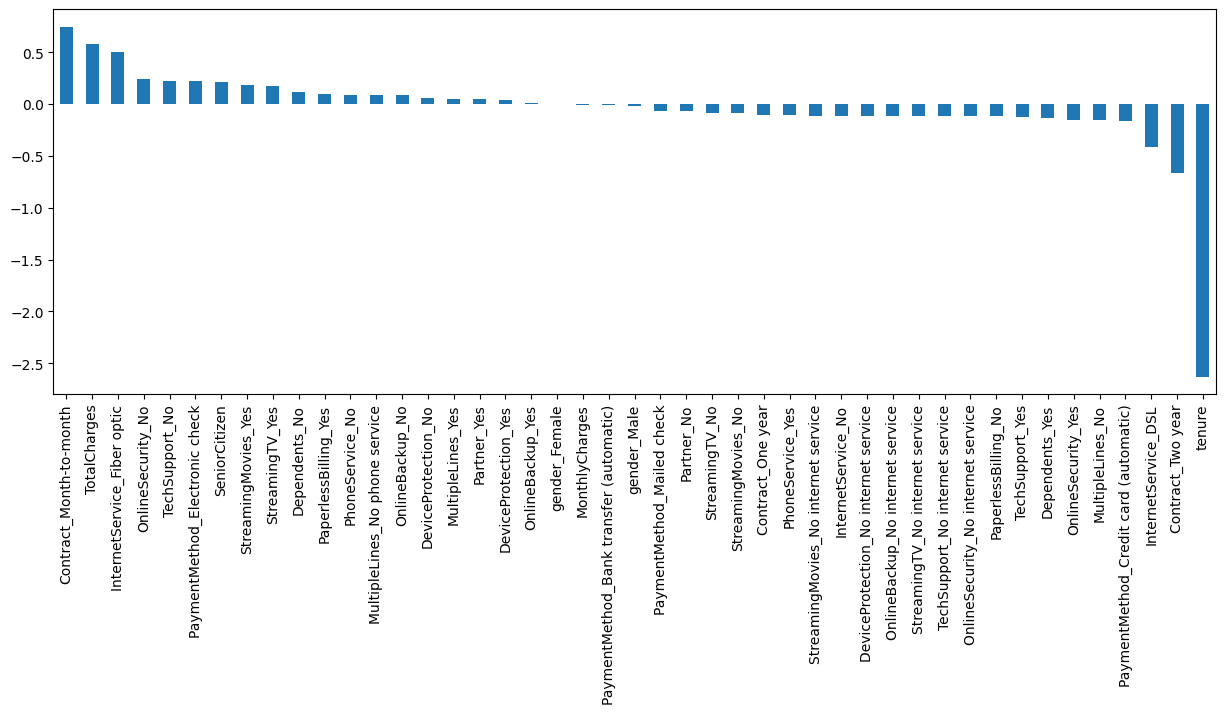

In [39]:
weights = pd.Series(ridge.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar');

Ridge no convierte a los features que aportan poco en 0